In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [31]:
# 加载MNIST数据集
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# print(x_train.shape)
# 数据预处理
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype("float32") / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype("float32") / 255.0

# 将标签转化为one-hot编码
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [32]:
# 构建CNN模型
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [33]:
# 编译模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [34]:
# 训练模型
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8656 - loss: 0.4469 - val_accuracy: 0.9843 - val_loss: 0.0519
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9803 - loss: 0.0608 - val_accuracy: 0.9888 - val_loss: 0.0407
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9870 - loss: 0.0414 - val_accuracy: 0.9858 - val_loss: 0.0445
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9902 - loss: 0.0322 - val_accuracy: 0.9875 - val_loss: 0.0439
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9916 - loss: 0.0262 - val_accuracy: 0.9902 - val_loss: 0.0375


In [35]:

# 测试模型
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9880 - loss: 0.0365
Test accuracy: 0.9904000163078308


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


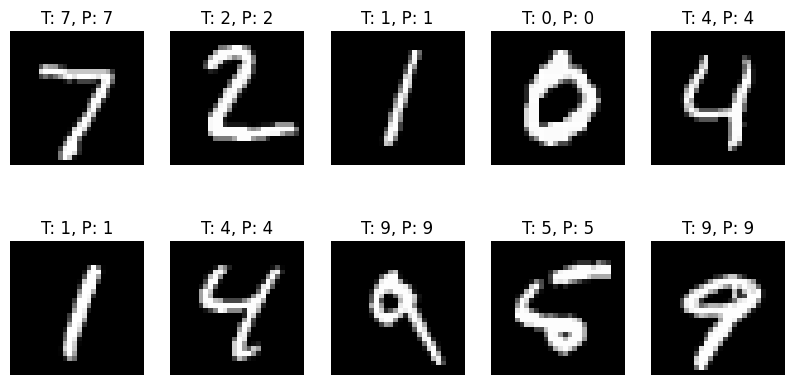

In [36]:

# 可视化部分预测结果
def plot_predictions(images, labels, predictions):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap="gray")
        true_label = np.argmax(labels[i])
        pred_label = np.argmax(predictions[i])
        plt.title(f"T: {true_label}, P: {pred_label}")
        plt.axis("off")
    plt.show()

predictions = model.predict(x_test[:10])
plot_predictions(x_test[:10], y_test[:10], predictions)
